## import important libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Sales Transaction v.4a.csv')
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


## Data Preparation and Cleaning

In [3]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [4]:
df.shape

(536350, 8)

In [5]:
df.size

4290800

In [6]:
df.columns

Index(['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Price',
       'Quantity', 'CustomerNo', 'Country'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [8]:
# checking null values
df.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [9]:
# Remove null values from the dataset
del_df = df.dropna(axis=0, how='any', inplace=True)
del_df

In [10]:
df.isnull().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

In [11]:
# Convert data type of date into datetime
date_format = '%m/%d/%Y'
df['Date'] = pd.to_datetime(df['Date'], format=date_format)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536295 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  536295 non-null  object        
 1   Date           536295 non-null  datetime64[ns]
 2   ProductNo      536295 non-null  object        
 3   ProductName    536295 non-null  object        
 4   Price          536295 non-null  float64       
 5   Quantity       536295 non-null  int64         
 6   CustomerNo     536295 non-null  float64       
 7   Country        536295 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [12]:
# Create new columns
df['TotalPrice'] = df['Price'] * df['Quantity']

# create year column
df['Year'] = df['Date'].dt.year

# create month column
df['Month'] = df['Date'].dt.month

In [13]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalPrice,Year,Month
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,2019,12
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,2019,12
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,2019,12
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,2019,12
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,2019,12


## Exploratory analysis & Visualization

In [14]:
df.describe()

,Price,Quantity,CustomerNo,TotalPrice,Year,Month
count,536295.000000,536295.000000,536295.000000,5.362950e+05,536295.000000,536295.000000
mean,12.662031,9.923902,15227.893178,1.124341e+02,2018.921515,7.558452
std,8.490638,216.671641,1716.582932,2.277487e+03,0.268933,3.509416
min,5.130000,-80995.000000,12004.000000,-8.401138e+05,2018.000000,1.000000
25%,10.990000,1.000000,13807.000000,1.618000e+01,2019.000000,5.000000
50%,11.940000,3.000000,15152.000000,4.272000e+01,2019.000000,8.000000
75%,14.090000,10.000000,16729.000000,1.160250e+02,2019.000000,11.000000
max,660.620000,80995.000000,18287.000000,1.002718e+06,2019.000000,12.000000


## Find outliers

<Axes: >

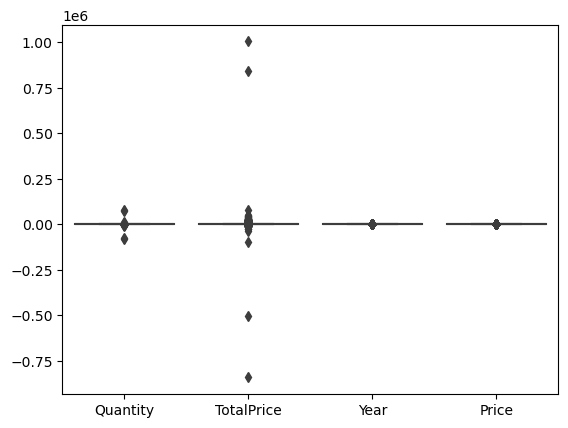

In [15]:
sns.boxplot(df[['Quantity','TotalPrice','Year', 'Price']])

# IQR Method

In [16]:
# cleaning ouliter in totalprice column
Q1 = df['TotalPrice'].quantile(0.25)
Q3 = df['TotalPrice'].quantile(0.75)

In [17]:
IQR = Q3 - Q1

In [18]:
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

In [19]:
lower_limit,upper_limit

(-133.58749999999998, 265.7925)

<Axes: >

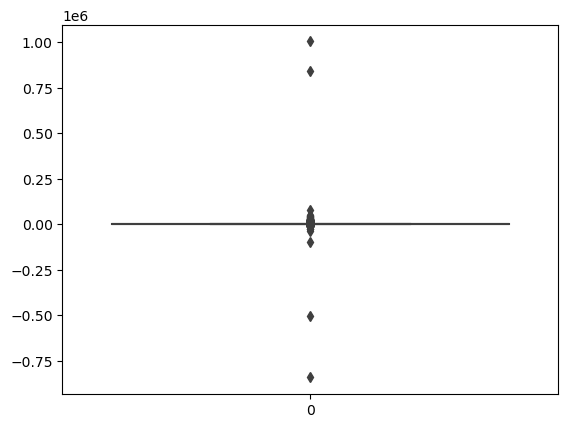

In [20]:
 sns.boxplot(df['TotalPrice'])

## Finding First outlier

In [21]:
df.loc[(df['TotalPrice'] >= upper_limit) | (df['TotalPrice'] <= lower_limit)]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalPrice,Year,Month
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,2019,12
19,581475,2019-12-09,22581,Wood Stocking Christmas Scandispot,10.55,48,13069.0,United Kingdom,506.40,2019,12
20,581476,2019-12-09,23198,Pantry Magnetic Shopping List,11.53,48,12433.0,Norway,553.44,2019,12
21,581476,2019-12-09,23197,Sketchbook Magnetic Shopping List,11.74,24,12433.0,Norway,281.76,2019,12
24,581476,2019-12-09,23167,Small Ceramic Top Storage Jar,10.96,96,12433.0,Norway,1052.16,2019,12
...,...,...,...,...,...,...,...,...,...,...,...
536328,C536391,2018-12-01,21983,Pack Of 12 Blue Paisley Tissues,10.55,-24,17548.0,United Kingdom,-253.20,2018,12
536329,C536391,2018-12-01,21980,Pack Of 12 Red Retrospot Tissues,10.55,-24,17548.0,United Kingdom,-253.20,2018,12
536330,C536391,2018-12-01,21484,Chick Grey Hot Water Bottle,13.79,-12,17548.0,United Kingdom,-165.48,2018,12
536331,C536391,2018-12-01,22557,Plasters In Tin Vintage Paisley,11.94,-12,17548.0,United Kingdom,-143.28,2018,12


In [22]:
# triming - deleting the outlier data
new_df = df.loc[(df['TotalPrice'] < upper_limit) & (df['TotalPrice'] > lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:', len(new_df))
print('outliers:', len(df) - len(new_df))

before removing outliers: 536295
after removing outliers: 491490
outliers: 44805


<Axes: >

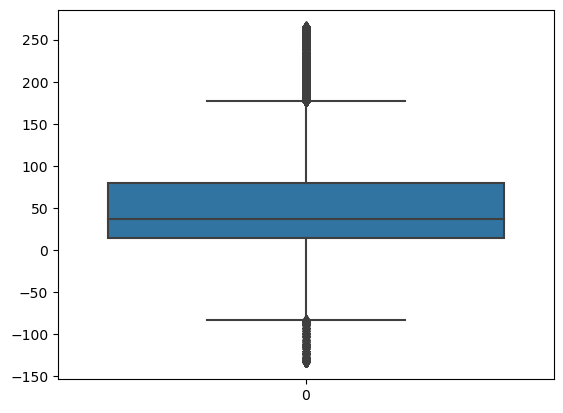

In [23]:
sns.boxplot(new_df['TotalPrice'])

In [34]:
# capping - change the outlier values to upper or lower limit values
new_df = df.copy()
new_df.loc[new_df['TotalPrice'] >= upper_limit, 'TotalPrice'] = upper_limit
new_df.loc[new_df['TotalPrice'] <= lower_limit, 'TotalPrice'] = lower_limit

<Axes: >

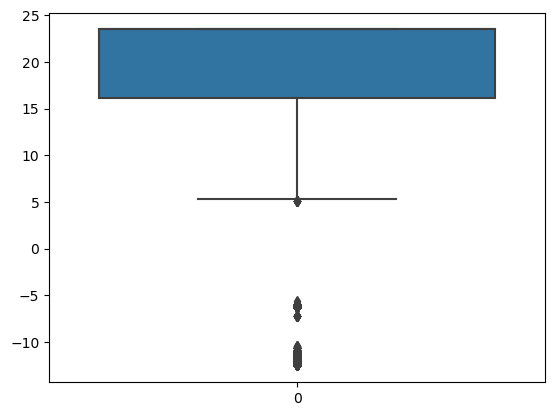

In [35]:
sns.boxplot(new_df['TotalPrice'])

# IQR Method

In [36]:
# cleaning outlier in quantity column
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)


In [37]:
lower_limit,upper_limit

(-12.5, 23.5)

<Axes: >

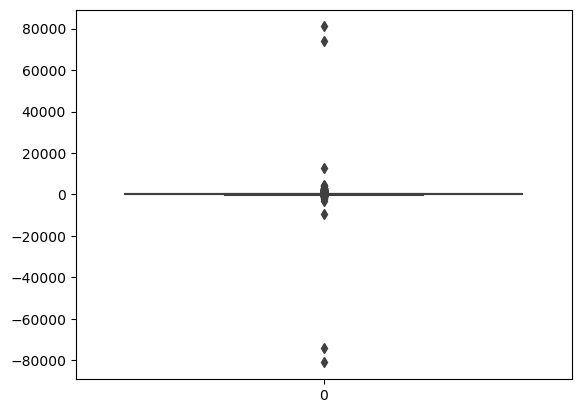

In [38]:
sns.boxplot(df['Quantity'])

## Find Second Outlier

In [39]:
df.loc[(df['Quantity'] >= upper_limit) | (df['Quantity'] <= lower_limit)]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalPrice,Year,Month
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,2019,12
5,581475,2019-12-09,21705,Bag 500g Swirly Marbles,10.65,24,13069.0,United Kingdom,255.60,2019,12
9,581475,2019-12-09,22216,T-Light Holder White Lace,10.55,24,13069.0,United Kingdom,253.20,2019,12
16,581475,2019-12-09,22955,36 Foil Star Cake Cases,11.06,24,13069.0,United Kingdom,265.44,2019,12
18,581475,2019-12-09,22956,36 Foil Heart Cake Cases,11.06,24,13069.0,United Kingdom,265.44,2019,12
...,...,...,...,...,...,...,...,...,...,...,...
536274,536374,2018-12-01,21258,Victorian Sewing Box Large,21.47,32,15100.0,United Kingdom,687.04,2018,12
536327,C536391,2018-12-01,21984,Pack Of 12 Pink Paisley Tissues,10.55,-24,17548.0,United Kingdom,-253.20,2018,12
536328,C536391,2018-12-01,21983,Pack Of 12 Blue Paisley Tissues,10.55,-24,17548.0,United Kingdom,-253.20,2018,12
536329,C536391,2018-12-01,21980,Pack Of 12 Red Retrospot Tissues,10.55,-24,17548.0,United Kingdom,-253.20,2018,12


In [40]:
# triming - deleting the outlier data
new_df = df.loc[(df['Quantity'] < upper_limit) & (df['Quantity'] > lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:', len(new_df))
print('outliers:', len(df) - len(new_df))

before removing outliers: 536295
after removing outliers: 478936
outliers: 57359


<Axes: >

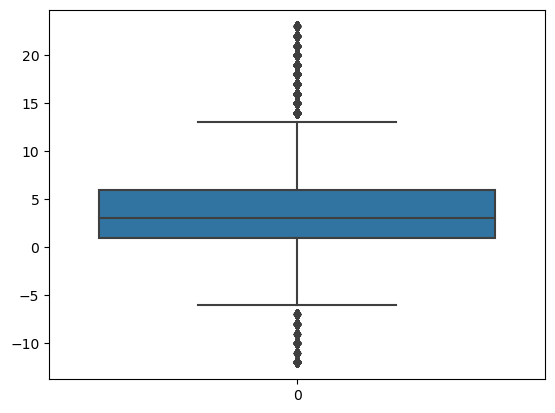

In [41]:
sns.boxplot(new_df['Quantity'])

In [42]:
# capping - change the outlier values to upper or lower limit values
new_df = df.copy()
new_df.loc[new_df['Quantity'] >= upper_limit, 'Quantity'] = upper_limit
new_df.loc[new_df['Quantity'] <= lower_limit, 'Quantity'] = lower_limit

<Axes: >

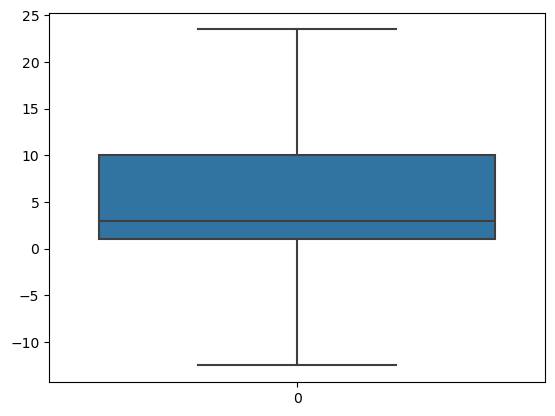

In [43]:
sns.boxplot(new_df['Quantity'])

## Top 5 products with highest Total Price

In [44]:
new_df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalPrice,Year,Month
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12.0,17490.0,United Kingdom,257.64,2019,12
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,23.5,13069.0,United Kingdom,383.40,2019,12
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12.0,13069.0,United Kingdom,138.36,2019,12
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12.0,13069.0,United Kingdom,127.80,2019,12
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6.0,13069.0,United Kingdom,71.64,2019,12


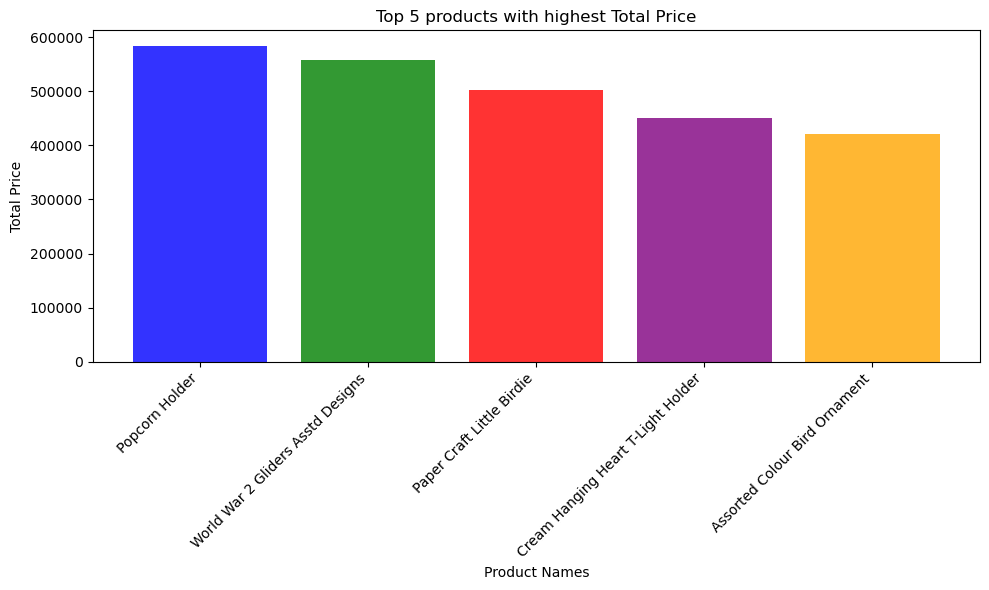

In [45]:
top_5 = new_df[['TotalPrice','ProductName']]
top_5 = top_5.groupby(by='ProductName').sum()
top_5 = top_5.sort_values('TotalPrice', ascending=False)
top_5 = top_5.head()

# MYSQL
# select totalprice, productname from new_df
# group by productname
# order by totalprice desc limit 5

colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(10, 6))
plt.bar(top_5.index, top_5['TotalPrice'], align='center', alpha=0.8, color=colors)
plt.xlabel('Product Names')
plt.ylabel('Total Price')
plt.title('Top 5 products with highest Total Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



## What was the best month for sales? How much was earned that month?

In [46]:
new_df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalPrice,Year,Month
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12.0,17490.0,United Kingdom,257.64,2019,12
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,23.5,13069.0,United Kingdom,383.40,2019,12
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12.0,13069.0,United Kingdom,138.36,2019,12
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12.0,13069.0,United Kingdom,127.80,2019,12
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6.0,13069.0,United Kingdom,71.64,2019,12


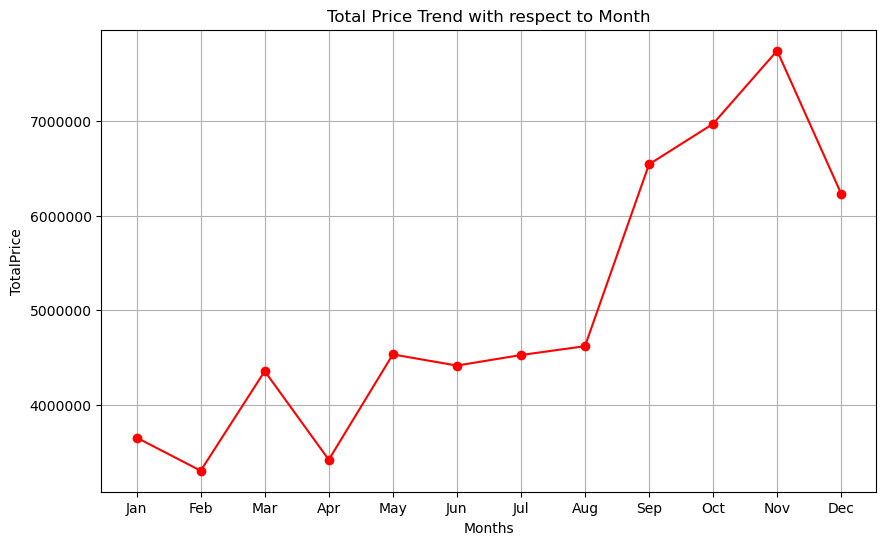

In [47]:
Monthly_TotalPrice = new_df[['Month', 'TotalPrice']]
Monthly_TotalPrice = Monthly_TotalPrice.groupby(by='Month').sum()
Monthly_TotalPrice = Monthly_TotalPrice.sort_values('Month', ascending=True)  # Sort by month

# Define month names for x-axis labels
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# color
line_color = 'red'

plt.figure(figsize=(10, 6))
plt.plot(month_names, Monthly_TotalPrice['TotalPrice'], 'o-', color=line_color)
plt.title('Total Price Trend with respect to Month')
plt.xlabel('Months')
plt.ylabel('TotalPrice')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()


## Top 5 countries with highest Total Price

In [48]:
new_df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalPrice,Year,Month
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12.0,17490.0,United Kingdom,257.64,2019,12
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,23.5,13069.0,United Kingdom,383.40,2019,12
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12.0,13069.0,United Kingdom,138.36,2019,12
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12.0,13069.0,United Kingdom,127.80,2019,12
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6.0,13069.0,United Kingdom,71.64,2019,12


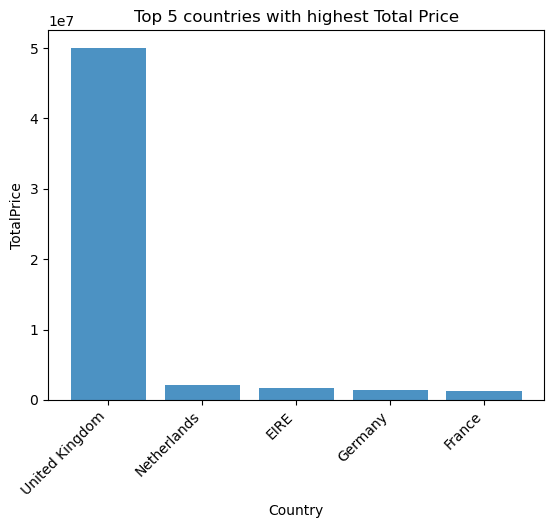

In [49]:
Top_5_highest_countries = new_df[['Country','TotalPrice']]
Top_5_highest_countries = Top_5_highest_countries.groupby(by='Country').sum()
Top_5_highest_countries = Top_5_highest_countries.sort_values('TotalPrice', ascending = False)
Top_5_highest_countries = Top_5_highest_countries.head()

plt.bar(Top_5_highest_countries.index, Top_5_highest_countries['TotalPrice'], align='center', alpha=0.8)
plt.title('Top 5 countries with highest Total Price')
plt.xlabel("Country")
plt.ylabel("TotalPrice")
plt.xticks(rotation=45, ha='right')
plt.show()

## Top 5 countries with lowest Total Price

In [50]:
new_df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalPrice,Year,Month
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12.0,17490.0,United Kingdom,257.64,2019,12
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,23.5,13069.0,United Kingdom,383.40,2019,12
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12.0,13069.0,United Kingdom,138.36,2019,12
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12.0,13069.0,United Kingdom,127.80,2019,12
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6.0,13069.0,United Kingdom,71.64,2019,12


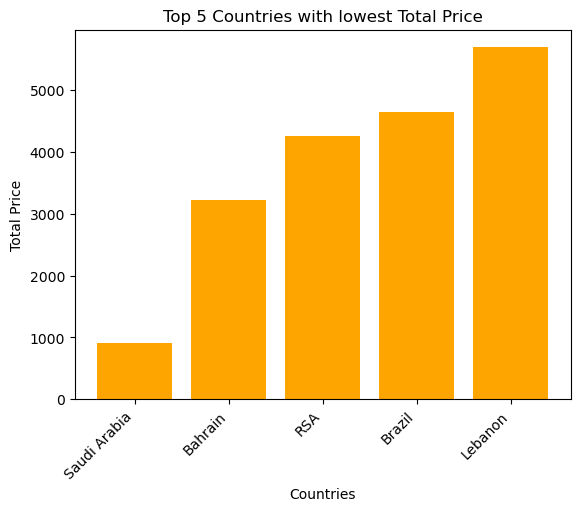

In [51]:
top_5_lowest_countries = new_df[['Country','TotalPrice']]
top_5_lowest_countries = top_5_lowest_countries.groupby(by='Country').sum()
top_5_lowest_countries = top_5_lowest_countries.sort_values('TotalPrice', ascending=True)
top_5_lowest_countries = top_5_lowest_countries.head()
colors = 'orange'

plt.bar(top_5_lowest_countries.index, top_5_lowest_countries['TotalPrice'], color=colors)
plt.title('Top 5 Countries with lowest Total Price')
plt.xlabel('Countries')
plt.ylabel('Total Price')
plt.xticks(rotation=45, ha='right')
plt.show()

In [52]:
new_df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalPrice,Year,Month
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12.0,17490.0,United Kingdom,257.64,2019,12
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,23.5,13069.0,United Kingdom,383.40,2019,12
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12.0,13069.0,United Kingdom,138.36,2019,12
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12.0,13069.0,United Kingdom,127.80,2019,12
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6.0,13069.0,United Kingdom,71.64,2019,12


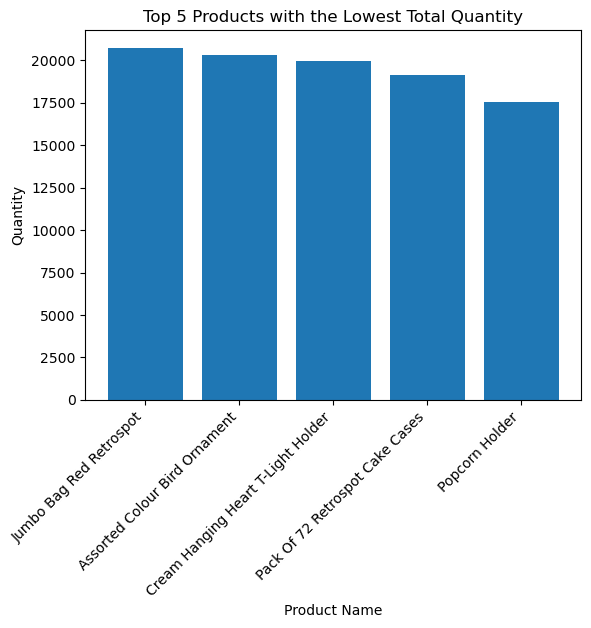

In [53]:
top_5_lowest_products = new_df[['ProductName', 'Quantity']]
top_5_lowest_products = top_5_lowest_products.groupby(by='ProductName').sum()
top_5_lowest_products = top_5_lowest_products.sort_values('Quantity', ascending=False)
top_5_lowest_products = top_5_lowest_products.head()

plt.bar(top_5_lowest_products.index, top_5_lowest_products['Quantity'])
plt.title('Top 5 Products with the Lowest Total Quantity')
plt.xlabel('Product Name')
plt.ylabel('Quantity')
plt.xticks(rotation=45, ha='right')
plt.show()


## Top 5 Countries with Highest Total Price for Year 2019  

In [54]:
new_df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalPrice,Year,Month
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12.0,17490.0,United Kingdom,257.64,2019,12
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,23.5,13069.0,United Kingdom,383.40,2019,12
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12.0,13069.0,United Kingdom,138.36,2019,12
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12.0,13069.0,United Kingdom,127.80,2019,12
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6.0,13069.0,United Kingdom,71.64,2019,12


In [55]:
# create new data for 2019 sales
data2019 = new_df[new_df['Year'] == 2019]
data2019

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalPrice,Year,Month
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12.0,17490.0,United Kingdom,257.64,2019,12
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,23.5,13069.0,United Kingdom,383.40,2019,12
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12.0,13069.0,United Kingdom,138.36,2019,12
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12.0,13069.0,United Kingdom,127.80,2019,12
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6.0,13069.0,United Kingdom,71.64,2019,12
...,...,...,...,...,...,...,...,...,...,...,...
494251,C540030,2019-01-04,22070,Small Red Retrospot Mug In Box,14.09,-12.5,16029.0,United Kingdom,-338.16,2019,1
494252,C540097,2019-01-04,22835,Hot Water Bottle I Am So Poorly,15.02,-4.0,15373.0,United Kingdom,-60.08,2019,1
494253,C540097,2019-01-04,22179,Set 10 Night Owl Lights,17.17,-4.0,15373.0,United Kingdom,-68.68,2019,1
494254,C540097,2019-01-04,22113,Grey Heart Hot Water Bottle,14.09,-4.0,15373.0,United Kingdom,-56.36,2019,1


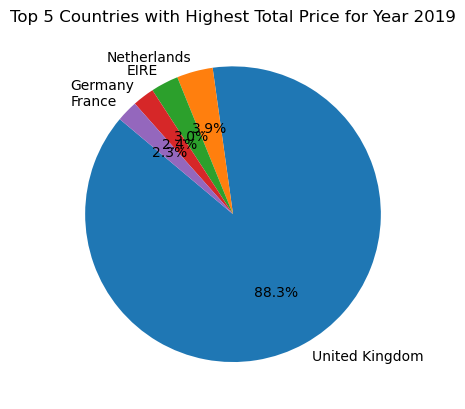

In [56]:
top_5_highest_2019 = data2019[['Country','TotalPrice']]
top_5_highest_2019 = top_5_highest_2019.groupby('Country').sum()
top_5_highest_2019 = top_5_highest_2019.sort_values('TotalPrice', ascending=False)
# Take the top 5 countries
top_5_highest_2019 = top_5_highest_2019.head()


plt.pie(top_5_highest_2019['TotalPrice'], labels=top_5_highest_2019.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Countries with Highest Total Price for Year 2019')
plt.show()

# Conclusion

### 1:Popcorn Holder is the product with the highest total price.
### 2:November is the best month that make highest money
### 3:The United Kingdom has the highest total price among all countries.
### 4:Saudi Arabia has the lowest total price among all countries
### 5:Popcorn Holder has the lowest total quantity among all products.
### 6:The United Kingdom has the highest total price among all countries in 2019.